# Energy Prediction Project Documentation
## **Overview:**
This Jupyter Notebook aims to analyze and preprocess household power consumption data, preparing it for further predictive modeling. The dataset includes measurements of various power consumption sub-meters within a household.

Introduction
Data Acquisition
Data Exploration
Data Cleaning
Data Visualization
Type Conversion
Conclusion

# 1. Introduction
The purpose of this project is to predict household energy consumption based on available features. The dataset provides a rich source of information regarding power consumption patterns, which can be leveraged for predictive modeling.

In [3]:
import pandas as pd
import numpy as np

# 2. Data Acquisition
The dataset is retrieved from Google Drive using the gdown library. The file is assumed to be in a CSV format with semicolon (;) delimiters.

In [4]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=54212d94-7bd1-4336-8dac-7adac61326c1
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 79.6MB/s]


`!gdown --fuzzy ..`: This command uses the gdown library to download the dataset from Google Drive using the provided link. The --fuzzy option allows it to work with URLs that are not direct download links.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Acquisition
Upon loading the data into a pandas DataFrame, we perform an initial exploration to understand the structure, content, and overall shape of the dataset.

### Dataset Attributes

The dataset is a time series of electrical power consumption measurements, comprising the following columns:

- **Date and Time**: Timestamp of the measurement.
- **Global Active Power**: Measured in kilowatts (kW).
- **Global Reactive Power**: Measured in kilowatts (kW).
- **Voltage**: Measured in volts (V).
- **Global Intensity**: Measured in amperes (A).
- **Sub Metering 1**: Watt-hours of active energy for sub-meter 1.
- **Sub Metering 2**: Watt-hours of active energy for sub-meter 2.
- **Sub Metering 3**: Watt-hours of active energy for sub-meter 3.

In [9]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-9-68e29b680bbb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


`df = pd.read_csv(...)`: Reads the CSV file into a pandas DataFrame named df. The sep=";" argument specifies that the values in the CSV are separated by semicolons.

In [10]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


`df.head()`: Displays the first five rows of the DataFrame df, providing a quick look at the data structure and values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


`df.info()`: Outputs a summary of the DataFrame, including the number of entries, column names, data types, and non-null counts.

In [12]:
df.shape

(2075259, 9)

`df.shape`: Returns a tuple representing the dimensions of the DataFrame (number of rows and columns).

In [13]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


`df.tail()`: Displays the last five rows of the DataFrame, allowing you to inspect the end of the dataset.

In [14]:
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


`df.describe(include=object)`: Generates descriptive statistics for columns with object data types (usually categorical data), providing insights into the unique values and their counts.

## Observations
The dataset contains multiple features related to energy consumption.
The structure and data types are assessed using info() and describe() methods

# 4. Data Cleaning
Handling Missing Values
Initial checks reveal that the Sub_metering_3 feature contains null values.

In [15]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


`df.isnull().any()`: Checks if there are any null (missing) values in the DataFrame. Returns True for any column that contains null values.


In [16]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


## Imputation Strategies
Various strategies are employed to handle missing values:
* Filling with Zeros
* Filling with Mean
* Filling with Median
* Dropping Missing Values

In [17]:
round(100 * df.Sub_metering_3.isnull().sum()/len(df),0)

1.0

`round(100 * ... , 0)`: Calculates the percentage of missing values in the Sub_metering_3 column and rounds it to the nearest integer.

In [18]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


`df.describe()`: Generates descriptive statistics for all numeric columns, including count, mean, standard deviation, min, max, and quartiles.

In [19]:
df.fillna(0)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


`df.fillna(0)`: This method fills any null values in the DataFrame with zeros. However, without inplace=True, it does not modify the original DataFrame.

In [20]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


`df.isnull().sum()`: Checks again for null values after the fill operation to confirm that they have been addressed.

In [21]:
##df.fillna(0, inplace=True)  use inplace to replace null values permanently

`df.fillna(0, inplace=True)`: This commented-out line would replace null values with zeros in the original DataFrame permanently if uncommented.

In [22]:
df.fillna(df['Sub_metering_3'].mean()) # replace null values with mean value

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


`df.fillna(df['Sub_metering_3'].mean())`: This method fills null values in the Sub_metering_3 column with the mean of that column. It does not modify the DataFrame unless inplace=True is used.

In [23]:
df.fillna(df['Sub_metering_3'].median()) # replacing with median value indtead of null

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [24]:
df.dropna().shape

(2049280, 9)

`df.dropna().shape:`This drops rows containing any missing values in the DataFrame, useful if missing data cannot be sensibly imputed.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

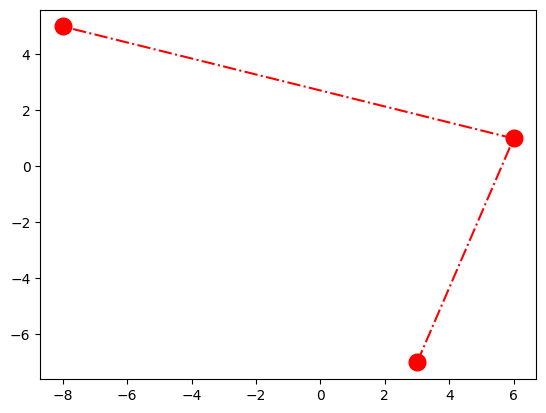

In [26]:
d1 = np.array([3,6,-8])
d2 = np.array([-7,1,5])
plt.plot(d1,d2, 'ro', markersize = 12, linestyle = '-.')

Creates a scatter plot of arrays `d1` and `d2` with red circular markers and dash-dot lines. This is likely for testing visualization.


In [30]:
import pandas as pd # Importing pandas for data manipulation

# Replace '?' with NaN (Not a Number) which pandas can handle for numeric conversions
df['Global_active_power'] = df['Global_active_power'].replace('?', pd.NA)

# Convert the column to float, ignoring errors (coercing them to NaN)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

`df['Global_active_power'].astype(float)`:Converts the Global_active_power column to a float type, ensuring numerical consistency.

# **Datetime Conversion and Feature Engineering**
Since energy consumption data is often time-based, extracting useful features from the timestamp data can enhance predictions.

In [29]:
# Convert 'Date' and 'Time' columns to a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Set the DateTime as the index (useful for time series analysis)
df.set_index('DateTime', inplace=True)

# Extract additional time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Day_of_Week'] = df.index.dayofweek


These features can help capture daily, monthly, and hourly patterns in the energy consumption.